In [1]:
import re
import os
import glob
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('pdf', fonttype=42)
import seaborn as sns
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

In [36]:
known_motifs = glob.glob(f"condition_dmr/*/motif_Aging_Hyper.DMR/knownResults.txt")
len(known_motifs)

58

## plot all cell subclasses

In [37]:
motif_pvalue = defaultdict(dict)

for motif_result in known_motifs:
    result_df = pd.read_csv(motif_result, sep="\t", index_col=0)
    result_df.index = [x.split("/")[0] for x in result_df.index]

    cell_type = motif_result.split("/")[1]
    hyp = motif_result.split("/")[-2].split(".")[0]
    for motif, row in result_df.iterrows():
        if row['P-value'] < 0.01:
            motif_pvalue[motif][f'{cell_type}'] = row['P-value']
motif_pvalue_df = pd.DataFrame.from_dict(motif_pvalue, orient='index')
motif_pvalue_df = -np.log10(motif_pvalue_df.sort_index(axis=1).sort_index()).fillna(0)
motif_pvalue_df.replace([np.inf, -np.inf], 0, inplace=True)

z_scores_motif_pvalue_df = stats.zscore(motif_pvalue_df, axis = 0)
use_tfs = z_scores_motif_pvalue_df.sum(axis = 1).sort_values(ascending = False).index[:100]

f_z_scores_motif_pvalue_df= z_scores_motif_pvalue_df.loc[use_tfs]

In [38]:
f_z_scores_motif_pvalue_df.shape

(100, 51)

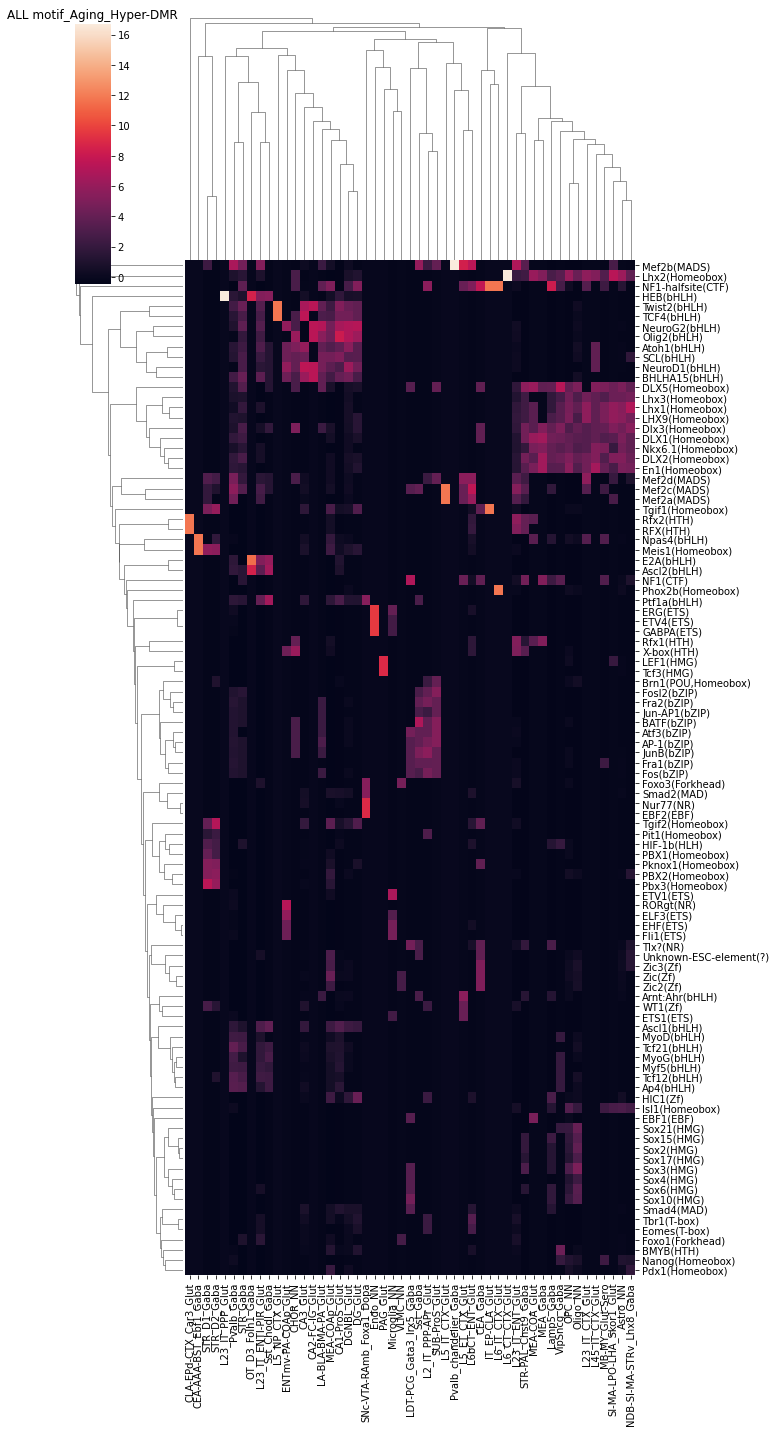

In [39]:
clustermap = sns.clustermap(data=f_z_scores_motif_pvalue_df,
                        figsize=(10, 20),
                        xticklabels=True,
                        yticklabels=True)

plt.title(f"ALL {hyp}-DMR")

clustermap.savefig(f"figure/ALL {hyp}-DMR", dpi=300)
plt.show()

## plot by cell_class

In [33]:
cell_class_dict = defaultdict(list)
for path in known_motifs:
    cell_class = path.split('/')[1].split('_')[-1]
    cell_class_dict[cell_class].append(path)

In [43]:
cell_class_list = ['NN','Glut','Gaba']
cell_class = 'Glut'

In [ ]:
for cell_class in cell_class_list:
    use_known_motifs =   cell_class_dict[cell_class]
    motif_pvalue = defaultdict(dict)

    for motif_result in use_known_motifs:
        result_df = pd.read_csv(motif_result, sep="\t", index_col=0)
        result_df.index = [x.split("/")[0] for x in result_df.index]

        cell_type = motif_result.split("/")[1]
        hyp = motif_result.split("/")[-2].split(".")[0]
        for motif, row in result_df.iterrows():
            if row['P-value'] < 0.01:
                motif_pvalue[motif][f'{cell_type}'] = row['P-value']
    motif_pvalue_df = pd.DataFrame.from_dict(motif_pvalue, orient='index')
    motif_pvalue_df = -np.log10(motif_pvalue_df.sort_index(axis=1).sort_index()).fillna(0)
    motif_pvalue_df.replace([np.inf, -np.inf], 0, inplace=True)
    
    z_scores_motif_pvalue_df = stats.zscore(motif_pvalue_df, axis = 0)
    use_tfs = z_scores_motif_pvalue_df.sum(axis = 1).sort_values(ascending = False).index[:51]
    
    f_z_scores_motif_pvalue_df= z_scores_motif_pvalue_df.loc[use_tfs]
    
    clustermap = sns.clustermap(data=f_z_scores_motif_pvalue_df,
                            figsize=(6, 14),
                            xticklabels=True,
                            yticklabels=True)

    plt.title(f"{cell_class} {hyp}-DMR")

    clustermap.savefig(f"figure/{cell_class} {hyp}-DMR", dpi=300)
    plt.show()